In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np
import seaborn as sns

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('housing.csv')

# Display descriptive statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


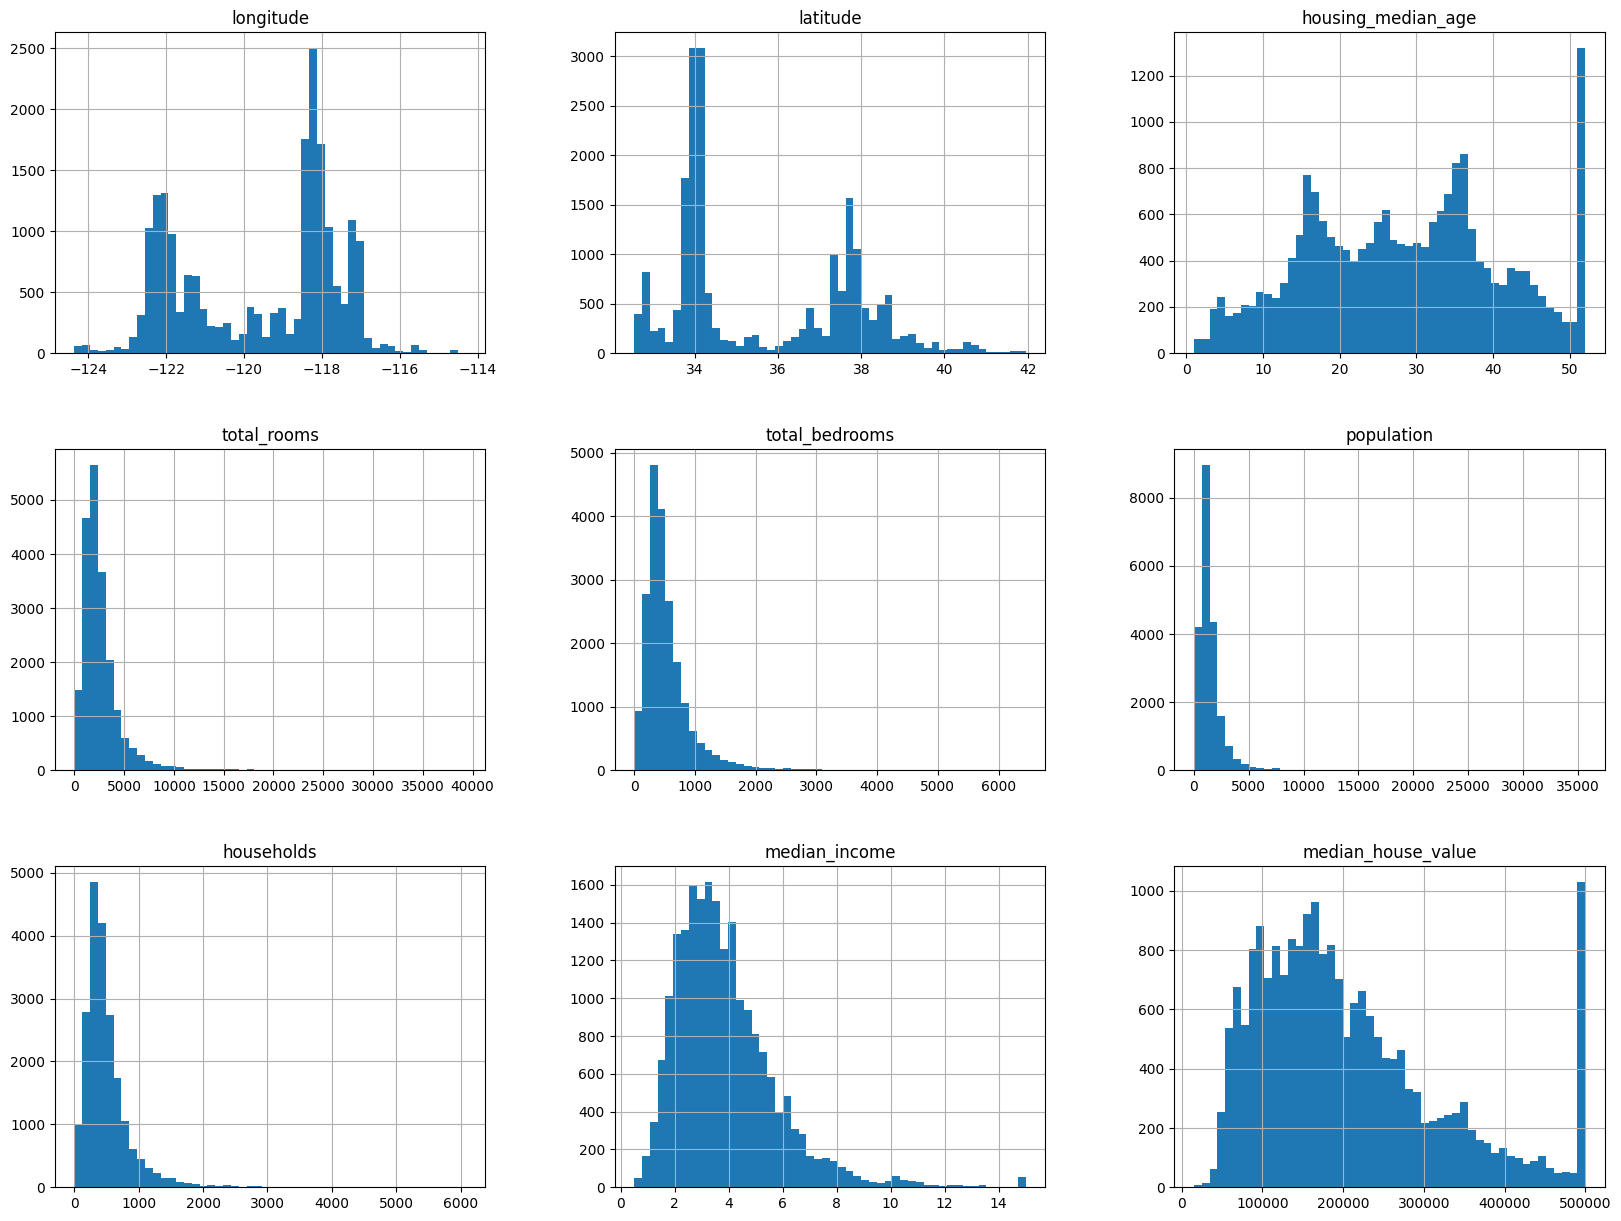

Interpretation of Histograms:
Median Income:
The histogram of median income shows the distribution of income levels in the dataset.
The median of the distribution can be approximated by observing the peak or the mode of the histogram.
The histogram reveals the skewness and kurtosis, providing information on the overall income distribution's shape.

House Median Age:
The histogram of house median age shows the distribution of ages of houses in the dataset.
The median of the distribution can be approximated by observing the peak or the mode of the histogram.
The histogram reveals the skewness and kurtosis, providing insights into whether the houses are mostly new or old, and the spread of house ages in the region.


In [ ]:
# Plot the histogram of each feature(Indicate what does histogram
# indicate on median_income and house_median_age)


# Plot histograms for each numerical feature
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Interpretation of median_income and house_median_age histograms
print("Interpretation of Histograms:")
print("Median Income:")
print("The histogram of median income shows the distribution of income levels in the dataset.")
print("The median of the distribution can be approximated by observing the peak or the mode of the histogram.")
print("The histogram reveals the skewness and kurtosis, providing information on the overall income distribution's shape.")
print()
print("House Median Age:")
print("The histogram of house median age shows the distribution of ages of houses in the dataset.")
print("The median of the distribution can be approximated by observing the peak or the mode of the histogram.")
print("The histogram reveals the skewness and kurtosis, providing insights into whether the houses are mostly new or old, and the spread of house ages in the region.")


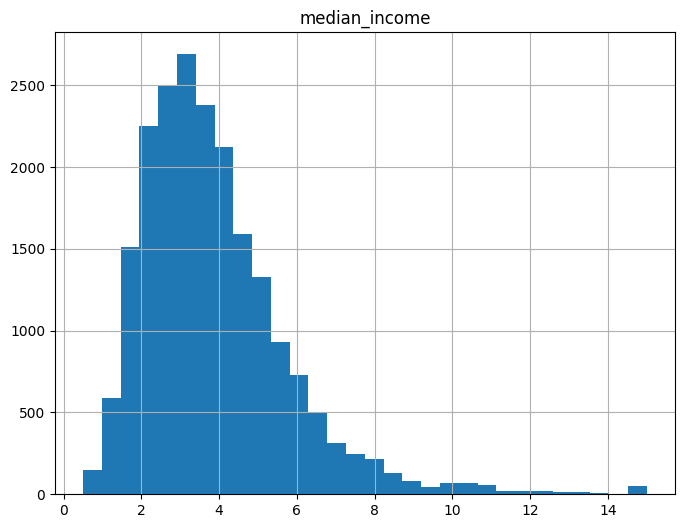

In [ ]:
import matplotlib.pyplot as plt
df.hist(column="median_income", bins=30, figsize=(8,6))
plt.show()

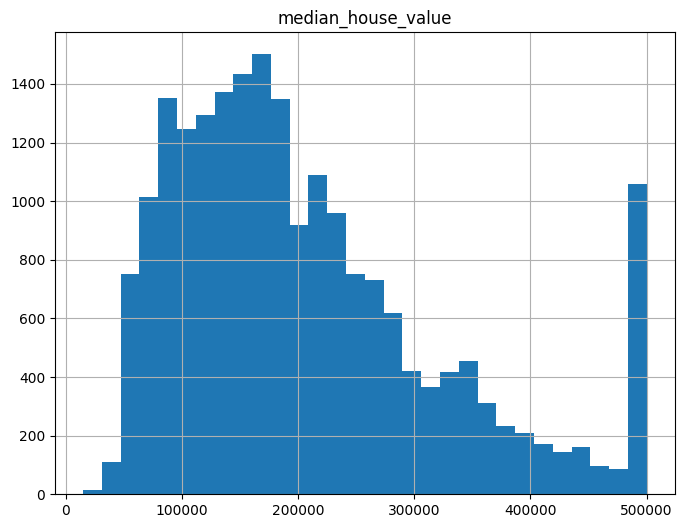

In [ ]:
import matplotlib.pyplot as plt
df.hist(column="median_house_value", bins=30, figsize=(8,6))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Load the dataset
housing = pd.read_csv('housing.csv')

# For this demonstration, consider only 'median_income' and 'median_house_value'
housing_selected = housing[['median_income', 'median_house_value']].copy()

# Random split: This splits the data randomly without preserving any specific distribution.
train_set_random, test_set_random = train_test_split(housing_selected, test_size=0.2, random_state=42)

# Explanation:
# - The stratified split creates an 'income_cat' column that bins median_income into 5 categories.
# - StratifiedShuffleSplit then splits the data such that the proportion of each income category
#   is maintained in both the train and test sets.
# - This method ensures that key distribution characteristics (like income) are preserved,
#   reducing the risk of sampling bias compared to a random split.


In [ ]:
print("Random Split:")
print("Random Train Set (first 5 rows):")
train_set_random.head()

Random Split:
Random Train Set (first 5 rows):


,median_income,median_house_value
14196,3.2596,103000.0
8267,3.8125,382100.0
17445,4.1563,172600.0
14265,1.9425,93400.0
2271,3.5542,96500.0


In [ ]:
print("Random Test Set (first 5 rows):")
test_set_random.head()

Random Test Set (first 5 rows):


,median_income,median_house_value
20046,1.6812,47700.0
3024,2.5313,45800.0
15663,3.4801,500001.0
20484,5.7376,218600.0
9814,3.7250,278000.0


In [ ]:
# Explanation:
# In a random split, the test set is created by randomly selecting 20% of the data.
# While simple, this method may lead to unbalanced distributions of key attributes (e.g., median_income).

# For stratified sampling, first create an income category.
housing_selected['income_cat'] = pd.cut(housing_selected['median_income'],
                                        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                        labels=[1, 2, 3, 4, 5])

# Use StratifiedShuffleSplit to ensure the income distribution is preserved in both sets.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_selected, housing_selected['income_cat']):
    strat_train_set = housing_selected.loc[train_index]
    strat_test_set = housing_selected.loc[test_index]

# Remove the temporary income category attribute.
for dataset in (strat_train_set, strat_test_set):
    dataset.drop("income_cat", axis=1, inplace=True)

In [ ]:
print("Stratified Split:")
print("Stratified Train Set (first 5 rows):")
strat_train_set.head()

Stratified Split:
Stratified Train Set (first 5 rows):


,median_income,median_house_value
12655,2.1736,72100.0
15502,6.3373,279600.0
2908,2.8750,82700.0
14053,2.2264,112500.0
20496,4.4964,238300.0


In [ ]:
print("Stratified Test Set (first 5 rows):")
strat_test_set.head()

Stratified Test Set (first 5 rows):


,median_income,median_house_value
5241,8.2816,500001.0
17352,5.0099,162500.0
3505,4.3839,204600.0
7777,3.2708,159700.0
14155,4.3529,184000.0


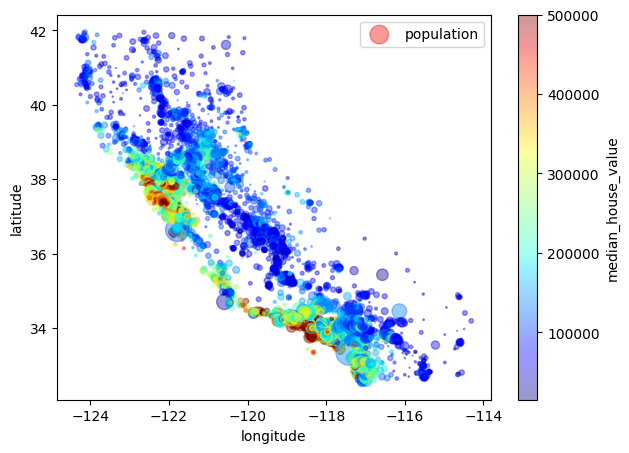

In [ ]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(7,5),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()


In [ ]:
# Drop the non-numeric column for correlation analysis
housing_numeric = housing.drop("ocean_proximity", axis=1)

def find_correlation(housing_numeric):
    # Compute the correlation matrix
    corr_matrix = housing_numeric.corr()
    # Return the correlations with median_house_value, sorted descending
    return corr_matrix["median_house_value"].sort_values(ascending=False)

# Compute correlation coefficients
cor_coef = find_correlation(housing_numeric)
print("Correlation Coefficient:\n", cor_coef)




Correlation Coefficient:
 median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


<ipython-input-91-8d9969019e2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cor_coef.index, y=cor_coef.values, palette='viridis')


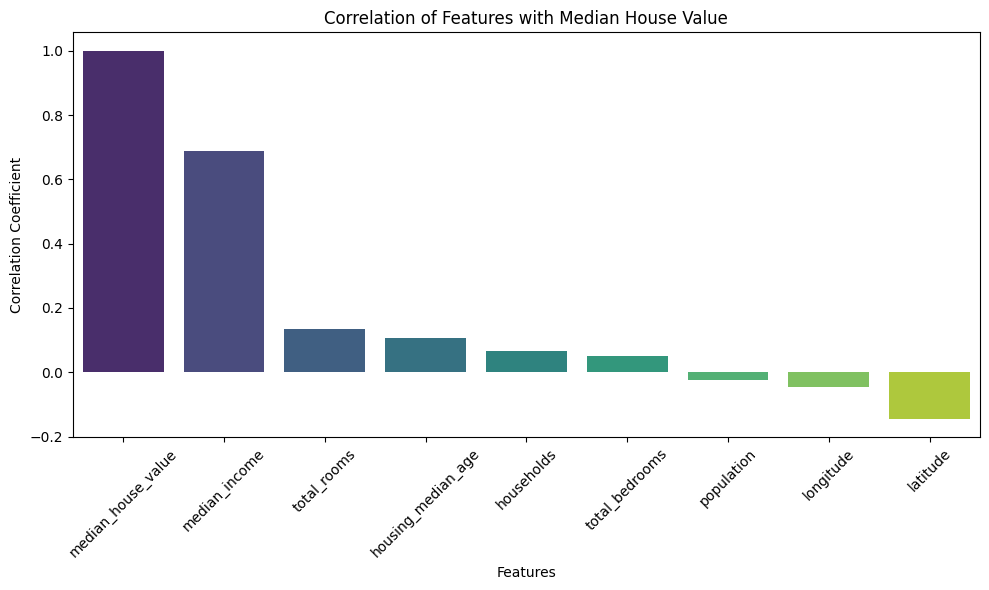

In [ ]:
# ----------------------------
# Plot 1: Bar Graph of Correlations
# ----------------------------
plt.figure(figsize=(10,6))
sns.barplot(x=cor_coef.index, y=cor_coef.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation of Features with Median House Value")
plt.tight_layout()
plt.show()


In [ ]:
# ----------------------------
# Identify the Most Correlated Feature (besides median_house_value itself)
# ----------------------------
# The first entry is median_house_value itself (correlation = 1), so take the second item.
max_feature = cor_coef.index[1]
print("\nFeature with maximum correlation (besides median_house_value itself):", max_feature)



Feature with maximum correlation (besides median_house_value itself): median_income


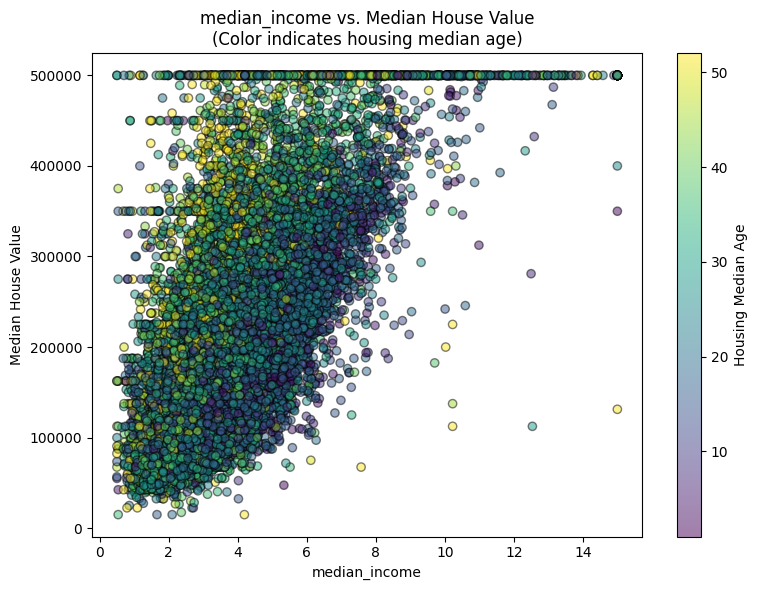

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
# Differentiate by using 'housing_median_age' for the color
scatter = plt.scatter(housing_numeric[max_feature],
                      housing_numeric["median_house_value"],
                      alpha=0.5,
                      c=housing_numeric["housing_median_age"],
                      cmap='viridis',
                      edgecolor='k')
plt.xlabel(max_feature)
plt.ylabel("Median House Value")
plt.title(f"{max_feature} vs. Median House Value\n(Color indicates housing median age)")
# Add a colorbar to explain the color mapping
cbar = plt.colorbar(scatter)
cbar.set_label("Housing Median Age")
plt.tight_layout()
plt.show()


Correlation with median_house_value:
 median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


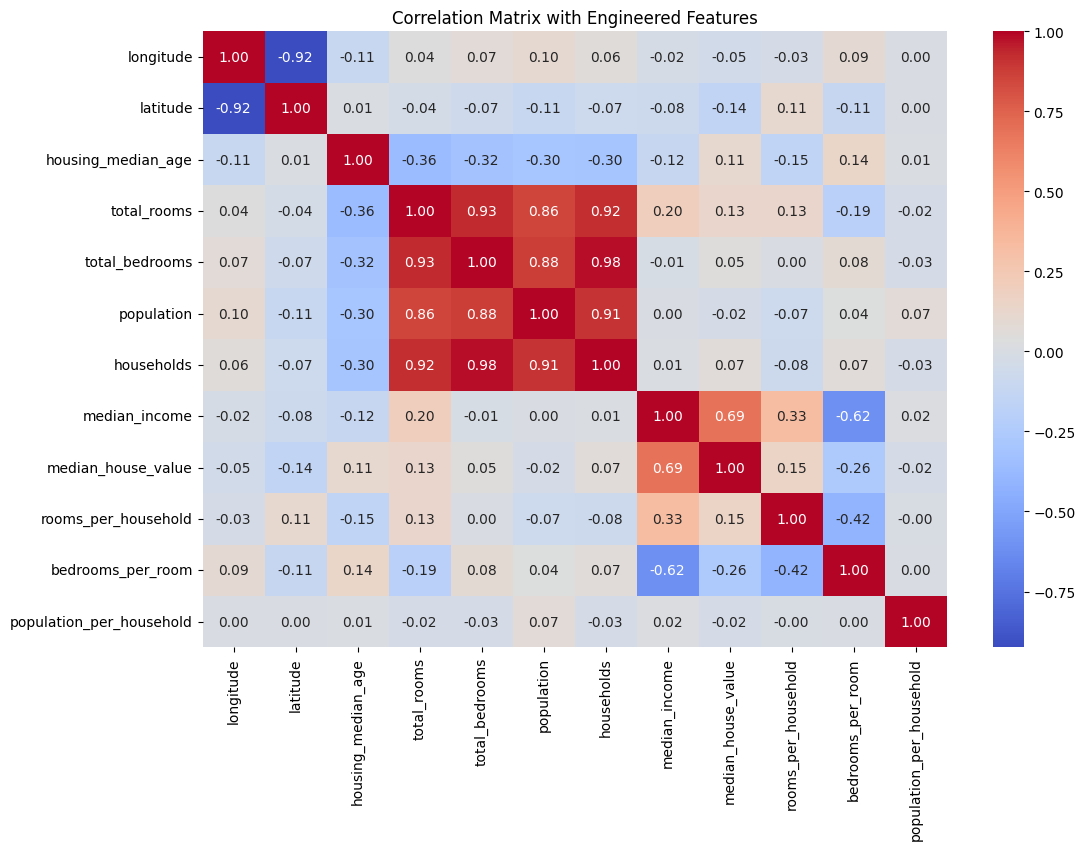

In [ ]:
# Load the dataset
housing = pd.read_csv('housing.csv')

# Create new combined features
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# Compute new correlation coefficients for these engineered features
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
print("Correlation with median_house_value:\n", corr_matrix["median_house_value"].sort_values(ascending=False))

# Plot a heatmap to see the updated correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Engineered Features")
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer

# Select numeric features for cleaning
housing_numeric = housing.drop("ocean_proximity", axis=1)

# Check for missing values
print("Missing values before cleaning:\n", housing_numeric.isnull().sum())

# Impute missing values using the median
imputer = SimpleImputer(strategy="median")
housing_numeric_imputed = pd.DataFrame(imputer.fit_transform(housing_numeric),
                                       columns=housing_numeric.columns)

# Verify that missing values have been handled
print("\nMissing values after cleaning:\n", housing_numeric_imputed.isnull().sum())


Missing values before cleaning:
 longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

Missing values after cleaning:
 longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Extract the categorical attribute
housing_cat = housing[["ocean_proximity"]]

# Perform one-hot encoding
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat).toarray()

# Create a DataFrame for the encoded features
housing_cat_1hot_df = pd.DataFrame(housing_cat_1hot,
                                   columns=encoder.get_feature_names_out(["ocean_proximity"]))
housing_cat_1hot_df.head()


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Custom transformer to add engineered attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Assumes X is a NumPy array with the following columns:
        # total_rooms (index 3), total_bedrooms (index 2), population (index 4), households (index 5)
        rooms_per_household = X[:, 3] / X[:, 5]
        population_per_household = X[:, 4] / X[:, 5]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 2] / X[:, 3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Identify numerical and categorical columns
num_attribs = housing.drop("ocean_proximity", axis=1).columns  # All numeric columns
cat_attribs = ["ocean_proximity"]

# Build numerical pipeline: impute missing values, add new attributes, then scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Build the full pipeline combining numerical and categorical processing
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# Process the dataset using the pipeline
housing_prepared = full_pipeline.fit_transform(housing)
print("Shape of processed data:", housing_prepared.shape)


Shape of processed data: (20640, 20)
